# Unused Codes

## Chinese snownlp

In [81]:
from snownlp import SnowNLP

In [86]:
text = "我今天很快樂。我今天很憤怒。太糟糕了！！！！！！！！！！！"
s = SnowNLP(text)
print(s.sentiments)

0.30907956381758117


## Latent Semantic Indexing

In [61]:
from sklearn.decomposition import TruncatedSVD
word_doc_matrix = np.transpose(tv_matrix)
svd = TruncatedSVD(n_components=3, algorithm='randomized', n_iter=20, random_state=None, tol=0.0)
word_topic_matrix = svd.fit_transform(word_doc_matrix)

In [52]:
word_doc_matrix.shape

(20, 8)

In [53]:
word_topic_matrix.shape

(20, 3)

In [54]:
svd.components_.shape

(3, 8)

In [55]:
topic_document_matrix = svd.components_

In [57]:
document_topic_df = pd.DataFrame(np.transpose(topic_document_matrix))
document_topic_df['sent']=norm_corpus
document_topic_df

,0,1,2,sent
0,0.325401,0.495890,-0.090850,sky blue beautiful
1,0.305785,0.477531,0.038835,love blue beautiful sky
2,0.454128,-0.334286,0.011847,quick brown fox jumps lazy dog
3,0.011490,0.028501,0.696026,kings breakfast sausages ham bacon eggs toast beans
4,0.041171,0.082868,0.704611,love green eggs ham sausages bacon
5,0.524452,-0.247205,-0.004549,brown fox quick blue dog lazy
6,0.292680,0.472925,-0.094965,sky blue sky beautiful today
7,0.481497,-0.349088,0.011383,dog lazy brown fox quick


In [58]:
topic_names = ['animal','weather','food']

In [59]:
pd.DataFrame(word_topic_matrix,
             index=feature_names,
            columns=topic_names)

,animal,weather,food
sky,0.019934,0.041849,0.501545
blue,0.004403,0.010922,0.266728
beautiful,0.451967,0.704163,-0.069712
ham,0.587725,0.527154,-0.062783
quick,0.004403,0.010922,0.266728
brown,0.606421,-0.386190,0.007703
today,0.606421,-0.386190,0.007703
love,0.019934,0.041849,0.501545
bacon,0.606421,-0.386190,0.007703
lazy,0.019383,0.039013,0.331720


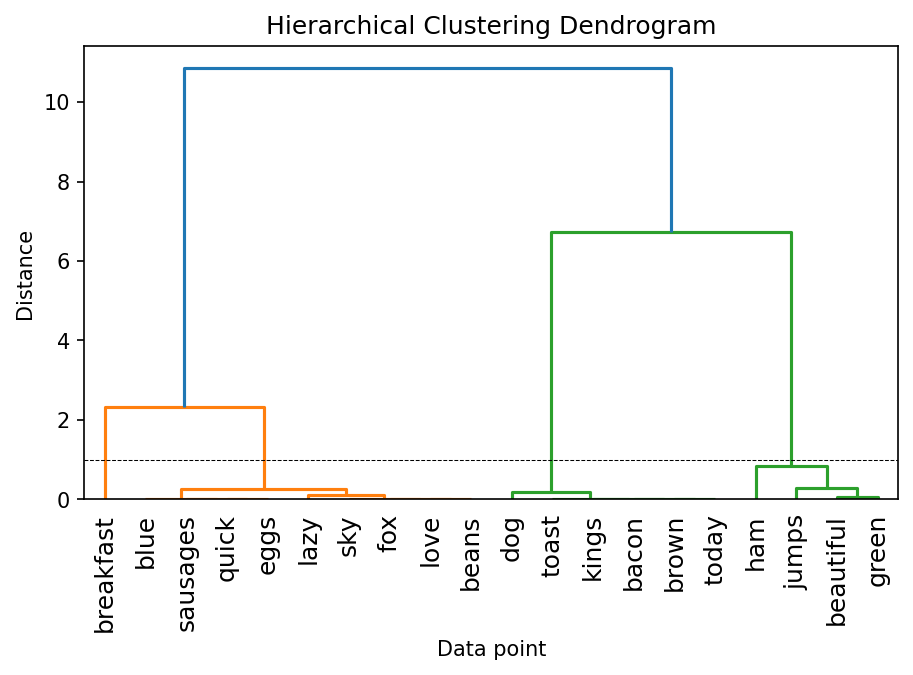

In [60]:
Z3 = linkage(cosine_similarity(word_topic_matrix), 'ward')
plt.figure(figsize=(7, 4))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
dendrogram(Z3, labels=feature_names, leaf_rotation=90)
plt.axhline(y=1.0, c='k', ls='--', lw=0.5)

In [81]:
from sklearn.decomposition import TruncatedSVD, LatentDirichletAllocation
#svd = TruncatedSVD(n_components=3, algorithm='randomized', n_iter=20, random_state=None, tol=0.0)
lds = LatentDirichletAllocation(n_components=3)
#tv_matrix = tv.fit_transform(norm_corpus)
#doc_topic_matrix = svd.fit_transform(tv_matrix)
doc_topic_matrix=lds.fit_transform(tv_matrix)

/Users/Alvin/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [83]:
topic_word_matrix = lds.components_

/Users/Alvin/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [84]:
pd.DataFrame(np.transpose(topic_word_matrix),index=feature_names)

/Users/Alvin/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2
sky,0.335124,0.336652,1.043941
blue,0.334849,0.336577,0.711788
beautiful,1.784931,0.335858,0.334178
ham,1.739686,0.339337,0.561710
quick,0.334849,0.336577,0.711788
brown,0.335897,0.336560,1.571470
today,0.335897,0.336560,1.571470
love,0.335124,0.336652,1.043941
bacon,0.335897,0.336560,1.571470
lazy,0.335492,0.336986,0.798305


In [86]:
import pyLDAvis
import pyLDAvis.sklearn
import dill
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lds, tv_matrix, tv, mds="mmds")

/Users/Alvin/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.041592  0.039797       1        1  58.267422
0      0.052326 -0.048843       2        1  31.248295
1     -0.010735  0.009046       3        1  10.484284, topic_info=         Term      Freq     Total Category  logprob  loglift
17        sky  1.000000  1.000000  Default  20.0000  20.0000
2   beautiful  1.000000  1.000000  Default  19.0000  19.0000
3        blue  1.000000  1.000000  Default  18.0000  18.0000
19      today  0.000000  0.000000  Default  17.0000  17.0000
14       love  0.000000  0.000000  Default  16.0000  16.0000
..        ...       ...       ...      ...      ...      ...
15      quick  0.094230  1.121871   Topic3  -2.9965  -0.2217
8         fox  0.094230  1.121871   Topic3  -2.9965  -0.2217
13       lazy  0.094230  1.121871   Topic3  -2.9965  -0.2217
3        blue  0.095008  1.193641   Topic3  -2.9882  -0.2755
17        sky  0.094019  1.249196   Topic3  -2.9987  -0.3315

[80 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
0         1  1.208472      bacon
2         2  0.920585  beautiful
3         2  0.837773       blue
5         1  0.891368      brown
6         1  0.891368        dog
7         1  1.208472       eggs
8         1  0.891368        fox
10        1  1.208472        ham
13        1  0.891368       lazy
15        1  0.891368      quick
16        1  1.208472   sausages
17        2  0.800515        sky, R=20, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2])

## Word Co-occurrence Matrix

In [99]:
cv = CountVectorizer(min_df=0., max_df=1.)
cv_matrix = cv.fit_transform(norm_corpus)

/Users/Alvin/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Create a co-occurrence matrix of unique words and initialize them to zero
uniq_wrds = cv.get_feature_names()
n = len(uniq_wrds)
co_mat = np.zeros((n,n))
co_mat

In [100]:
window_len = 2
def update_co_mat(x):   
    # Get all the words in the sentence and store it in an array wrd_lst
    wrd_list = x.split(' ')
    
    # Consider each word as a focus word
    for focus_wrd_indx, focus_wrd in enumerate(wrd_list):
        focus_wrd = focus_wrd.lower()
        # Get the indices of all the context words for the given focus word
        for contxt_wrd_indx in range((max(0,focus_wrd_indx - window_len)),(min(len(wrd_list),focus_wrd_indx + window_len +1))):                        
            # If context words are in the unique words list
            if wrd_list[contxt_wrd_indx] in uniq_wrds:
                
                # To identify the row number, get the index of the focus_wrd in the uniq_wrds list
                co_mat_row_indx = uniq_wrds.index(focus_wrd)
                
                # To identify the column number, get the index of the context words in the uniq_wrds list
                co_mat_col_indx = uniq_wrds.index(wrd_list[contxt_wrd_indx])
                                
                # Update the respective columns of the corresponding focus word row
                co_mat[co_mat_row_indx][co_mat_col_indx] += 1

/Users/Alvin/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [103]:
for sent in norm_corpus:
    update_co_mat(sent)
print()
print("Co-occurrence Matrix: ")
print(co_mat)


Co-occurrence Matrix: 
[[2. 0. 0. 0. 0. 0. 0. 1. 0. 0. 2. 0. 0. 0. 0. 0. 2. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 3. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 3. 0. 1.]
 [0. 0. 3. 4. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 4. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 3. 1. 0. 3. 0. 0. 1. 0. 1. 0. 3. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 1. 3. 0. 0. 0. 0. 1. 0. 3. 0. 1. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 2. 0. 1. 2. 0. 0. 0. 1. 0. 1. 0. 1. 0.]
 [0. 0. 0. 1. 0. 3. 0. 0. 3. 0. 0. 1. 0. 2. 0. 3. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [2. 0. 0. 0. 1. 0. 0. 2. 0. 1. 2. 0. 0. 0. 0. 0. 2. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 1. 3. 0. 2. 0. 0. 1. 0. 3. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 3. 1. 0. 3. 0.

/Users/Alvin/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
import seaborn as sns
plt.figure(figsize=(15,10))
df_cm1 = pd.DataFrame(co_mat, index=uniq_wrds, columns=uniq_wrds)
cf_hm1 = sns.heatmap(df_cm1, annot=True, xticklabels=uniq_wrds, yticklabels=uniq_wrds, linewidths=.5, 
                     linecolor='black', cmap="Blues", fontsize=4)
plt.yticks(rotation=0)
plt.title('Co-occurrence Matrix')

NameError: name 'plt' is not defined

In [111]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=3, max_iter=10000, random_state=0)


word_topic_matrix=lda.fit_transform(co_mat)

/Users/Alvin/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [114]:
topic_doc_matrix = lda.components_
pd.DataFrame(word_topic_matrix, index=feature_names)

/Users/Alvin/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2
sky,0.595865,0.367056,0.037079
blue,0.084586,0.832039,0.083374
beautiful,0.943782,0.027867,0.028351
ham,0.686289,0.019690,0.294022
quick,0.866018,0.067210,0.066771
brown,0.025653,0.025692,0.948655
today,0.031192,0.030377,0.938431
love,0.548977,0.420677,0.030346
bacon,0.024332,0.023861,0.951807
lazy,0.852744,0.080497,0.066759


/Users/Alvin/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


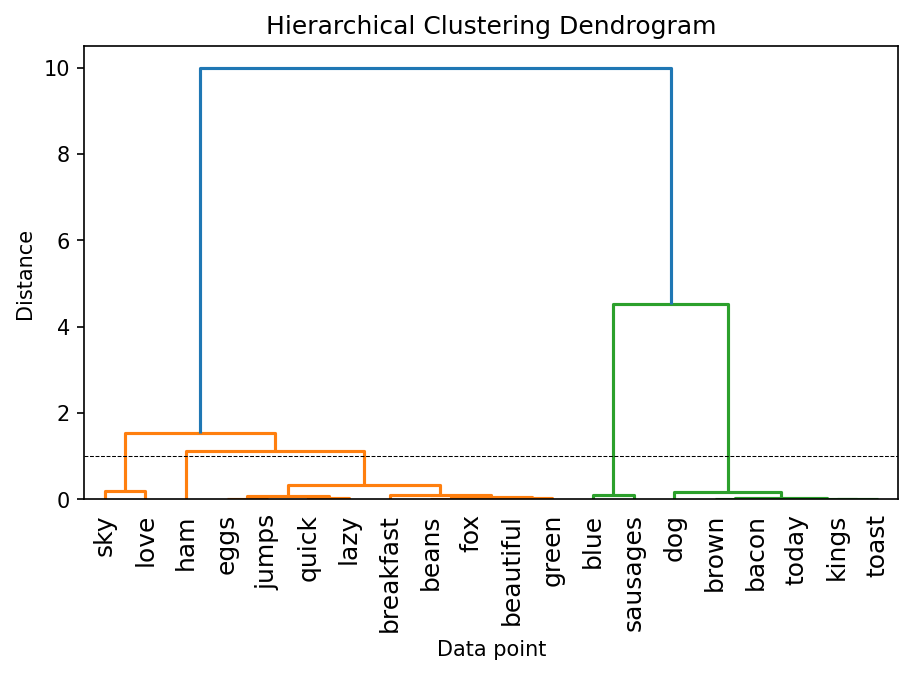

In [115]:
Z3 = linkage(cosine_similarity(word_topic_matrix), 'ward')
plt.figure(figsize=(7, 4))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
dendrogram(Z3, labels=feature_names, leaf_rotation=90)
plt.axhline(y=1.0, c='k', ls='--', lw=0.5)

## Testing Vectorizer

In [6]:
import pickle
with open('chinese_songs_words.pickle', 'rb') as f:
    documents_word_pos = pickle.load(f)

In [7]:
import unicodedata
import re
documents_words = [[unicodedata.normalize('NFKC',w) for (w,p) in d 
                    if re.match(r'^[nv]', p[0].lower()) and 
                    not re.match(r'[0-9a-zA-Z]', unicodedata.normalize('NFKC',w)) and
                    unicodedata.category(unicodedata.normalize('NFKC',w)[0])[0] not in ['P','S']
                                         ] for d in documents_word_pos]

[(w,p) for (w,p) in documents_word_pos[0] if w in ['(','...'] and re.match(r'^[nv]', p[0].lower())]

unicodedata.category('(') 
documents_norm = [' '.join(d) for d in documents_words]


In [13]:
documents_norm[0][:400]

'鳥群 離開 森林 整 座 天空 灰心 蝴蝶 吸引 玫瑰 盛開 安靜 遠方 風雨 不停 城市 蒼白 孤寂 徘徊 無助 人群 焦慮 何時 放晴 故事 裡 毀壞 有 風景 誰 摧毀不了 我們 夢境 弦月 旁 流星 劃過 天際 我 許下 願望 誰 說明 隕石 浩瀚 宇宙 間 旅行 璀璨 夜空 裡 漫天 水晶 我 禱告 有 回音 我 相信 背後 支撐 你 我 行 仰望 太陽 升起 聽見 鳥群 回來 聲音 我 守候 人 你 給 我 堅定 信心 雙手 彈奏出 黎明 愛 如此 動聽 鳥群 離開 森林 整 座 天空 灰心 蝴蝶 吸引 玫瑰 盛開 安靜 遠方 風雨 不停 城市 蒼白 孤寂 徘徊 無助 人群 焦慮 何時 放晴 故事 裡 毀壞 有 風景 誰 摧毀不了 我們 夢境 弦月 旁 流星 劃過 天際 我 許下 願望 誰 說明 隕石 浩瀚 宇宙 間 旅行 璀璨 夜空 裡 漫天 水晶 我 禱告 有 回音 我 相'

In [55]:
from sklearn.feature_extraction.text import CountVectorizer

texts=['鳥群 離開 森林 整 座 天空 灰心',
      '吸引 玫瑰 盛開 安靜 遠方 風雨',
      '隕石 浩瀚 宇宙 間 旅行']

cv = CountVectorizer(ngram_range=(1,2), token_pattern = '[^\s]*心[^\s]*')
m = cv.fit_transform(texts)

print(m.shape)

import pandas as pd

m_df = pd.DataFrame(m.toarray(), columns= cv.get_feature_names())
m_df

(3, 1)


,灰心
0,1
1,0
2,0


In [40]:
vocab = set([w for t in texts for w in t.split(' ')])
print(vocab)
print(len(vocab))

{'遠方', '整', '玫瑰', '隕石', '座', '森林', '鳥群', '浩瀚', '天空', '宇宙', '間', '風雨', '離開', '盛開', '旅行', '安靜', '灰心', '吸引'}
18


In [72]:
def myTokenizer(text, stopwords=['個','整']):
#     words = [w in text.split(' ')]
    bigrams = ['_'.join(b) for b in zip(text.split(" ")[:-1], text.split(" ")[1:]) if b[0] not in stopwords and b[1] not in stopwords]
    return bigrams
print(texts[0])
print(myTokenizer(texts[0]))

鳥群 離開 森林 整 座 天空 灰心
['鳥群_離開', '離開_森林', '座_天空', '天空_灰心']


In [73]:
cv1 = CountVectorizer(tokenizer=myTokenizer)
m1= cv1.fit_transform(texts)
pd.DataFrame(m1.toarray(), columns= cv1.get_feature_names())

,吸引_玫瑰,天空_灰心,宇宙_間,安靜_遠方,座_天空,浩瀚_宇宙,玫瑰_盛開,盛開_安靜,遠方_風雨,間_旅行,隕石_浩瀚,離開_森林,鳥群_離開
0,0,1,0,0,1,0,0,0,0,0,0,1,1
1,1,0,0,1,0,0,1,1,1,0,0,0,0
2,0,0,1,0,0,1,0,0,0,1,1,0,0


In [18]:
from sklearn.feature_extraction.text import CountVectorizer


names= ['Alvin', 'Alvis', 'Vincent', 'Vivian']

# def myVectorizer(name):
#     ngrams = [c1+'_'+c2 for (c1,c2) in zip(name[:-1],name[1:])]
#     return ngrams

def myVectorizer(name):
    return [name[0], name[len(name)-1]]

myVectorizer(names[0])
    

['A', 'n']

In [19]:
cv = CountVectorizer(tokenizer=myVectorizer, lowercase=True)
names_cv = cv.fit_transform(names)

import pandas as pd

names_cv_df =pd.DataFrame(names_cv.toarray(), columns=cv.get_feature_names(), index=names)
names_cv_df

,a,n,s,t,v
Alvin,1,1,0,0,0
Alvis,1,0,1,0,0
Vincent,0,0,0,1,1
Vivian,0,1,0,0,1
